In [21]:
import numpy as  np
import os
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential, load_model

In [13]:
#load images
images = np.load("images.npy")
labels = np.load("labels.npy")


#


x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size=0.33)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
input_shape = images.shape[1:]
batch_size = 50 
epochs = 10 
print(input_shape)

#process data
num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(60, 60, 1)


[0. 0. 1.]


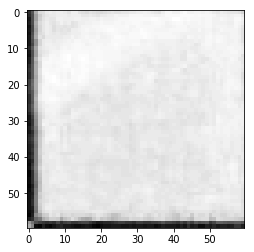

In [25]:
plt.imshow(x_train[1009,:,:,:].reshape(60,60,),cmap='Greys')
print(y_train[1009])

In [16]:
#add model

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()


Train on 3859 samples, validate on 1901 samples
Epoch 1/10
3859/3859 [==============================] - 29s - loss: 0.3548 - acc: 0.8544 - val_loss: 0.1160 - val_acc: 0.9558
Epoch 2/10
3859/3859 [==============================] - 28s - loss: 0.0463 - acc: 0.9863 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 3/10
3859/3859 [==============================] - 28s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 4/10
3859/3859 [==============================] - 28s - loss: 6.5436e-04 - acc: 1.0000 - val_loss: 9.2985e-04 - val_acc: 1.0000
Epoch 5/10
3859/3859 [==============================] - 28s - loss: 2.9747e-04 - acc: 1.0000 - val_loss: 2.3615e-04 - val_acc: 1.0000
Epoch 6/10
3859/3859 [==============================] - 28s - loss: 1.3897e-04 - acc: 1.0000 - val_loss: 1.1868e-04 - val_acc: 1.0000
Epoch 7/10
3859/3859 [==============================] - 28s - loss: 1.0039e-04 - acc: 1.0000 - val_loss: 1.5941e-04 - val_acc: 1.0000
Epoch 8/10
3859/3859 [================

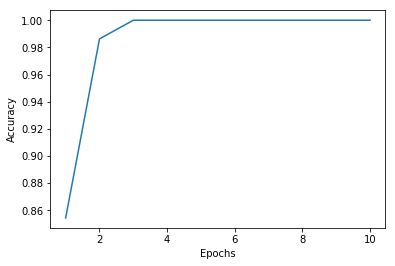

In [17]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [18]:
model.save('cnn.h5')

In [19]:
del model

In [22]:
model = load_model('cnn.h5')

In [24]:
model.predict(x_train[1009,:,:,:].reshape((1,60,60,1)))

array([[3.5659689e-06, 1.7756749e-08, 9.9999642e-01]], dtype=float32)